- You can perform ML and DL models on NLP data

- Read the NLP data

- Preprocess or text cleaning

- Apply the **word embeddings**

    - convert text to vector form 
    
    - BoW
    
    - tf-idf
    
- Develop the model

- Predictions

- Metrics

In [ ]:
# import nltk # Natural language tool kit
# nltk.download()

# import nltk
# nltk.download('punkt') --- Download Packages according to your Task

# If you Download Nltk no need to downloaed again just download perticular Package.

In [3]:
pip install scikit-learn

  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 10.1 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.1 MB 10.1 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 10.7 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 10.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 10.0 MB/s  0:00:00
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- -------------------

In [6]:
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

eng_stop_words=stopwords.words('English')  

In [8]:
data = pd.read_excel(r"C:\Users\ADMIN\Downloads\sam_NLT_NLP\IMDB_Dataset_sample.xlsx")

In [10]:
data.head()
# 1114 Rows 
# 2 Columns 

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [12]:
data.values[0]

array(["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to

In [14]:
data['sentiment'].value_counts()

sentiment
positive    558
negative    556
Name: count, dtype: int64

## Steps to follow:
**Apply the Preprocess**

**Convert text to vectors**

**apply ML model**

**metrics**

**prediction**

sentiment
positive    558
negative    556
Name: count, dtype: int64


<Axes: xlabel='sentiment'>

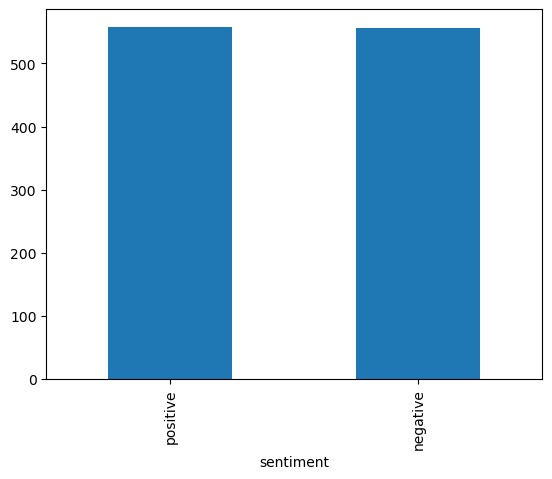

In [16]:
print(data.value_counts('sentiment'))
data.value_counts('sentiment').plot(kind='bar') 

In [18]:
map_dict = {'positive':1,
           'negative':0}
data['sentiment_numeric'] = data.sentiment.map(map_dict)
data.head()

,review,sentiment,sentiment_numeric
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [20]:
### Preprocessing Function
ps = PorterStemmer()
corpus = set()
def preprocess(text):
    ## removing unwanted space
    text = text.strip()
    ## removing html tags 
    text = re.sub("<[^>]*>", "",text)
    ## removing any numerical values
    text = re.sub('[^a-zA-Z]', ' ',text)
    ## lower case the word
    text = text.lower()
    # Remove the stop words
    text = text.split()
    text=[w for w in text if not w in eng_stop_words]
    ## stemming the word for sentiment analysis do not remove the stop word
    text = [ps.stem(word) for word in text]
    text = ' '.join(text)
    return text

In [22]:
data['Preprocessed_review'] = data.review.apply(preprocess)

In [24]:
data.head()

,review,sentiment,sentiment_numeric,Preprocessed_review
0,One of the other reviewers has mentioned that ...,positive,1,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,positive,1,wonder littl product film techniqu unassum old...
2,I thought this was a wonderful way to spend ti...,positive,1,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,0,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,petter mattei love time money visual stun film...


In [26]:
data.shape

(1114, 4)

In [28]:
### performing train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data.Preprocessed_review,
                                                 data.sentiment_numeric,
                                                 test_size=0.2,
                                                 random_state=42,
                                               stratify = data.sentiment_numeric)

In [30]:
x_train.shape,x_test.shape

((891,), (223,))

In [32]:
y_train.shape  , y_test.shape

((891,), (223,))

### Word Embedding Generation using $TF-IDF$

In [35]:
tf_idf = TfidfVectorizer()

In [37]:
tf_idf

,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None
,"analyzer analyzer: {'word', 'char', 'char_wb'} or callable, default='word'Whether the feature should be made of word or character n-grams.Option 'char_wb' creates character n-grams only from text insideword boundaries; n-grams at the edges of words are padded with space.If a callable is passed it is used to extract the sequence of featuresout of the raw, unprocessed input... versionchanged:: 0.21 Since v0.21, if ``input`` is ``'filename'`` or ``'file'``, the data is first read from the file and then passed to the given callable analyzer.",'word'
,"stop_words stop_words: {'english'}, list, default=NoneIf a string, it is passed to _check_stop_list and the appropriate stoplist is returned. 'english' is currently the only supported stringvalue.There are several known issues with 'english' and you shouldconsider an alternative (see :ref:`stop_words`).If a list, that list is assumed to contain stop words, all of whichwill be removed from the resulting tokens.Only applies if ``analyzer == 'word'``.If None, no stop words will be used. In this case, setting `max_df`to a higher value, such as in the range (0.7, 1.0), can automatically detectand filter stop words based on intra corpus document frequency of terms.",None
,"token_pattern token_pattern: str, default=r""(?u)\\b\\w\\w+\\b""Regular expression denoting what constitutes a ""token"", only usedif ``analyzer == 'word'``. The default regexp selects tokens of 2or more alphanumeric characters (punctuation is completely ignoredand always treated as a token separator).If there is a capturing group in token_pattern then thecaptured group content, not the entire match, becomes the token.At most one capturing group is permitted.",'(?u)\\b\\w\\w+\\b'
,"ngram_range ngram_range: tuple (min_n, max_n), default=(1, 1)The lower and upper boundary of the range of n-values for differentn-grams to be extracted. All values of n such that min_n <= n <= max_nwill be used. For example an ``ngram_range`` of ``(1, 1)`` means onlyunigrams, ``(1, 2)`` means unigrams and bigrams, and ``(2, 2)`` meansonly bigrams.Only applies if ``analyzer`` is not callable.","(1

In [39]:
#applying tf idf to training data

X_train_tf = tf_idf.fit_transform(x_train)
X_train_tf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 83678 stored elements and shape (891, 11806)>

In [41]:
len(tf_idf.vocabulary_)

11806

In [43]:
X_train_tf.shape

(891, 11806)

In [45]:
X_train_tf[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]], shape=(1, 11806))

**Apply same on test data**

In [48]:
#applying tf idf to training data

X_test_tf = tf_idf.transform(x_test)
X_test_tf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 18513 stored elements and shape (223, 11806)>

In [50]:
# --------- All Together --------------
# tf_idf = TfidfVectorizer()
# X_train_tf = tf_idf.fit_transform(x_train)
# X_test_tf = tf_idf.transform(x_test)

**for original data we need to use fit_transform**

**for test data we need to use transform**

## Model creation

In [54]:
#naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf,y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


**Prediction**

In [57]:
#predicted y

y_pred = naive_bayes_classifier.predict(X_test_tf)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1])

In [59]:
print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

              precision    recall  f1-score   support

    Positive       0.77      0.88      0.82       111
    Negative       0.86      0.74      0.80       112

    accuracy                           0.81       223
   macro avg       0.82      0.81      0.81       223
weighted avg       0.82      0.81      0.81       223



In [61]:
# Doing test prediction
[x_test.values[0]]

['believ worst movi ever seen life laugh coupl time probabl stupid someon paid see movi plot horribl made sens act bad even tell tri movi terribl rate f']

In [63]:
test_processed=preprocess(x_test.values[0])

In [65]:
test_input = tf_idf.transform([test_processed])

In [67]:
#0= bad review
#1= good review

res=naive_bayes_classifier.predict(test_input)[0]

if res==1:
    print("Good Review")
    
elif res==0:
    print("Bad Review")

Bad Review


In [69]:
### Testing all together
review=['Movie is good comedy works']
test_processed=preprocess(review[0])
test_input = tf_idf.transform([test_processed])
#0= bad review
#1= good review

res=naive_bayes_classifier.predict(test_input)

if res==1:
    print("Good Review")
    
elif res==0:
    print("Bad Review")

Good Review


- Preprocess

- Vectorizer

- Pass into the model

- Then model give predictions 1 and 0 

In [72]:
test_processed=preprocess("'pushpa movie is good but no comedy'")
test_input = tf_idf.transform([test_processed])
res=naive_bayes_classifier.predict(test_input)[0]
res

np.int64(1)

## Save the Trained Model

In [81]:
import joblib

joblib.dump(naive_bayes_classifier, "sentiment_model.pkl")

print("Model saved successfully!")

Model saved successfully!


## Save TF-IDF Vectorizer

In [85]:
joblib.dump(tf_idf, "vectorizer.pkl")

print("Vectorizer saved successfully!")

Vectorizer saved successfully!


## Load 

In [99]:
import joblib

model_data = {
    "model": naive_bayes_classifier,
    "vectorizer": tf_idf
}

joblib.dump(model_data, "sentiment_pipeline.pkl")

print("Complete pipeline saved successfully!")

Complete pipeline saved successfully!


In [101]:
import joblib

data = joblib.load("sentiment_pipeline.pkl")

naive_bayes_classifier = data["model"]
tf_idf = data["vectorizer"]

print("Loaded successfully!")

Loaded successfully!


## Front end for this

Perfect 👍 since now you understand the saving/loading part, I’ll give you a **clean, working Streamlit frontend** based on the correct structure.

I’ll assume you saved properly like this (recommended):

```python
joblib.dump({
    "model": naive_bayes_classifier,
    "vectorizer": tf_idf
}, "sentiment_pipeline.pkl")
```

If you did that, use the frontend below 👇

---

# 🚀 FINAL STREAMLIT FRONTEND (Professional UI)

## 📁 Folder Structure

```
movie_sentiment_app/
│
├── sentiment_pipeline.pkl
├── app.py
```

---

# ✅ `app.py` (Full Working Code)

Paste this completely:

```python
import streamlit as st
import joblib

# -------------------- Load Model -------------------- #
@st.cache_resource
def load_pipeline():
    data = joblib.load("sentiment_pipeline.pkl")
    return data["model"], data["vectorizer"]

model, vectorizer = load_pipeline()

# -------------------- Page Config -------------------- #
st.set_page_config(
    page_title="Movie Review Sentiment Analysis",
    page_icon="🎬",
    layout="centered"
)

# -------------------- UI -------------------- #
st.title("🎬 Movie Review Sentiment Analysis")
st.markdown("Analyze whether a movie review is **Positive** or **Negative** using Machine Learning.")

st.divider()

user_input = st.text_area(
    "Enter your movie review below:",
    height=150,
    placeholder="Example: This movie was absolutely fantastic with brilliant acting!"
)

# -------------------- Prediction -------------------- #
if st.button("Predict Sentiment"):

    if user_input.strip() == "":
        st.warning("⚠ Please enter a review first.")
    else:
        transformed_input = vectorizer.transform([user_input])
        prediction = model.predict(transformed_input)[0]
        probability = model.predict_proba(transformed_input)

        confidence = round(max(probability[0]) * 100, 2)

        st.divider()

        if prediction == 1:
            st.success(f"😊 Positive Review")
        else:
            st.error(f"😠 Negative Review")

        st.info(f"Confidence Score: {confidence}%")
```

---

# ▶️ Run The App

Open terminal inside the folder and run:

```bash
streamlit run app.py
```

---

# 🎯 What This UI Includes

✔ Clean layout
✔ Title and description
✔ Text area input
✔ Predict button
✔ Positive → Green
✔ Negative → Red
✔ Confidence score
✔ Cached model loading

---

# 🔥 If You Saved Separately (Model + Vectorizer)

Then replace loading part with this:

```python
@st.cache_resource
def load_pipeline():
    model = joblib.load("sentiment_model.pkl")
    vectorizer = joblib.load("vectorizer.pkl")
    return model, vectorizer
```

Everything else stays same.

---

If you want next level:

* Dark professional theme
* Modern card UI
* Deployment on Streamlit Cloud
* Add preprocessing inside app
* Add emoji animation

Tell me 😎
